# Predicting Student Grades Using Neural Networks

In this notebook, we analyze a dataset containing socioeconomic scores, study hours, sleep hours, attendance percentages, and corresponding student grades to build a regression model for predicting grades. We begin with data preprocessing and exploratory data analysis to understand the relationships between features, followed by feature scaling. Using TensorFlow, we construct a neural network, train it on the data, and evaluate its performance. Along the way, we visualize important insights and model outcomes to ensure robust predictions and gain deeper insights into the factors influencing student performance.

The dataset used is the [Predict Student Perfomance](https://www.kaggle.com/datasets/stealthtechnologies/predict-student-performance-dataset) dataset from [Kaggle](https://www.kaggle.com/)

## Import Libraries

Uncomment the following cell to install libraries.

In [1]:
# !pip install -r requirements.txt

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Preprocessing
We load the data and performing some basic preprocessing steps.

In [3]:
# Load the dataset
data = pd.read_csv('data.csv')

# Displaying the first few rows of the dataset
data.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


## Exploratory Data Analysis (EDA)
We'll perform some exploratory data analysis (EDA) to understand the relationships between the features and target variable (Grades).

In [4]:
# Checking for missing values
data.isnull().sum()

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

In [5]:
# Summary statistics of the dataset
data.describe()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


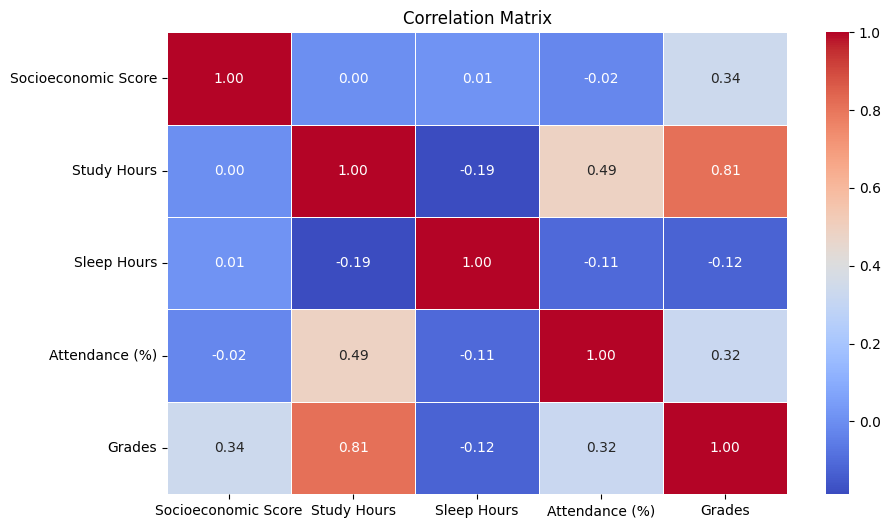

In [6]:
# Correlation matrix to understand feature relationships
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

## Feature Engineering
We now split the data into train and test set. We then scale the data using a `StandardScaler()`

In [7]:
# Separating features (X) and target (y)
X = data.drop(columns=['Grades'])
y = data['Grades']

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data for neural network model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Compile the Neural Network Model
Here, we define a simple neural network model for regression using Tensorflow.

In [8]:
# Building the neural network model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1)  # Output layer for regression (no activation function)
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Displaying the model summary
model.summary()

c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\medium\machine_learning\neural_network_grades_regression\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Next, we train the model and visualize the training results.

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1753.6832 - val_loss: 1575.7767
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1602.1616 - val_loss: 1396.0061
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1421.6104 - val_loss: 1042.5555
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 968.6982 - val_loss: 554.1049
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 442.7414 - val_loss: 169.3543
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 128.2567 - val_loss: 53.0320
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.4673 - val_loss: 39.0289
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.6148 - val_loss: 32.9107
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.1479 - val_loss: 28.7049
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.4541 - val_loss: 25.8860
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.5033 - val_loss: 23.8212
Epoch 12/100
35/35 ━━━━━

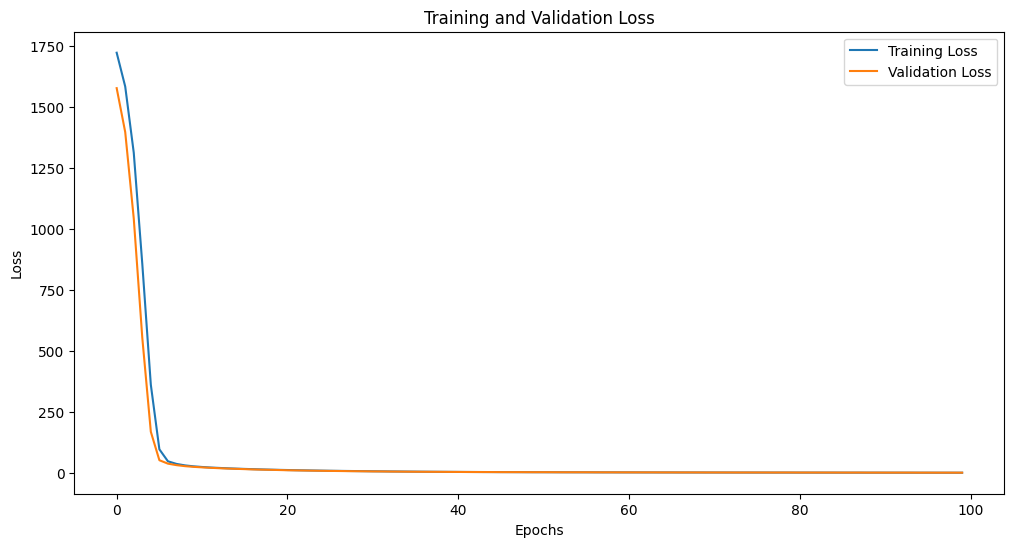

In [9]:
# Training the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('training_validation_loss.png')
plt.show()

## Model Evaluation
After training the model, we evaluate its performance on the test set.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2502 
Test Loss (Mean Squared Error): 2.079709529876709
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


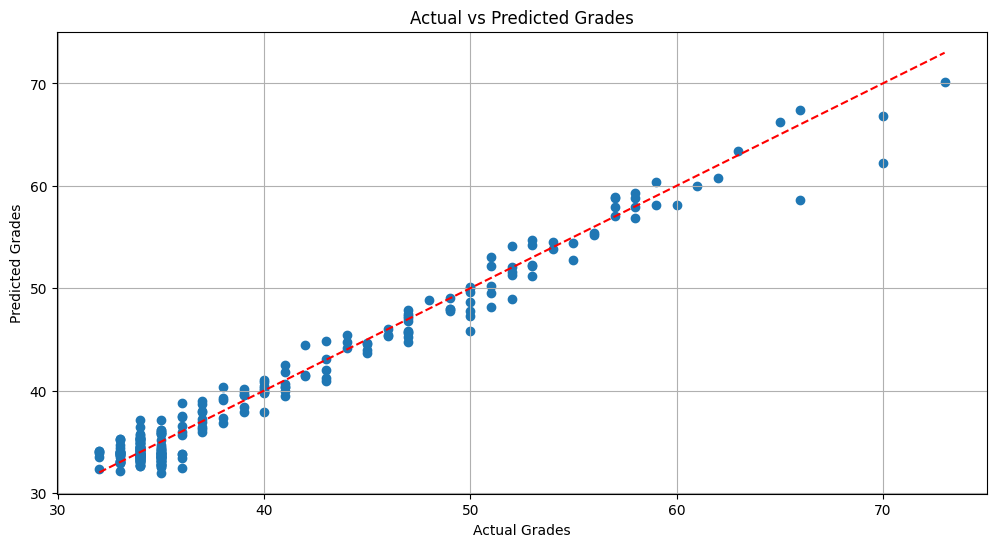

In [10]:
# Evaluating the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss (Mean Squared Error): {test_loss}')

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Grades')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()